# Imports

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

# Loading dataset

In [ ]:
dataset = keras.datasets.fashion_mnist

**Treinando o modelo**

In [8]:
((X_train, y_train),(X_test, y_test)) = dataset.load_data()
X_train.shape
X_test.shape

(10000, 28, 28)

# Creating, compiling, training and image visualization

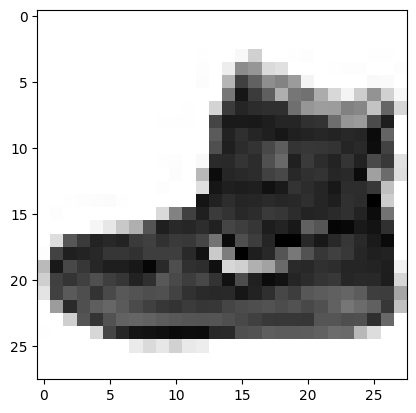

In [ ]:
from matplotlib import pyplot as plt


plt.imshow(X_train[0], cmap='Greys')

In [ ]:
y_train.max()
y_train.min()
total_labels = 10

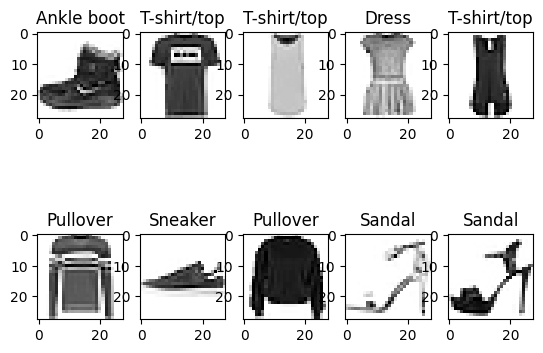

In [11]:
# By analyzing the fashion mnist documentation, it was possible to discover what each label means
"""" 
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for image in range(total_labels):
    plt.subplot(2,5,image+1)
    plt.imshow(X_train[image], cmap='Greys')
    plt.title(label_names[y_train[image]])

The model is a sequence of input, processing, and output. Therefore, the ideal approach is to literally bring this logic into the code

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer
    keras.layers.Dense(256, activation=tf.nn.relu), # Processing
    keras.layers.Dense(128, activation=tf.nn.relu), # Adding one more processing layer trying improve accuracy
    keras.layers.Dropout(0.2), # This line is to prevent overfitting
    keras.layers.Dense(10, activation=tf.nn.softmax) # Output with 10 classes because we have 10 labels
])

c:\Users\wes_b\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
#Compiling the model before training it
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])  # Indispensável para monitorar taxa de acertos

In [ ]:
#Training the model using early stopping to improve accuracy in choosing epochs
earlystop = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max', restore_best_weights=True)
history =  model.fit(X_train, y_train, epochs=25, validation_split=0.2, callbacks=[earlystop], batch_size=32)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5774 - loss: 6.9911 - val_accuracy: 0.7257 - val_loss: 0.8146
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6628 - loss: 0.8867 - val_accuracy: 0.7939 - val_loss: 0.5828
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7267 - loss: 0.7126 - val_accuracy: 0.8128 - val_loss: 0.5445
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7558 - loss: 0.6496 - val_accuracy: 0.8077 - val_loss: 0.5342
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7687 - loss: 0.6228 - val_accuracy: 0.8243 - val_loss: 0.5133
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7903 - loss: 0.5754 - val_accuracy: 0.8239 - val_loss: 0.5752
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8004 - loss: 0.5551 - val_accuracy: 0.8406 - val_loss: 0.4560
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8154 - loss: 0.5206 - 

# saving and loading the model with 25 epochs

In [ ]:
model.save('modelo.keras')
model_saved_25epochs = load_model('modelo.keras', custom_objects={'softmax_v2': tf.nn.softmax})

# Testing the model

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.3f} , \n Test loss: {test_loss:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8643 - loss: 0.4789
Test accuracy: 0.862 , 
 Test loss: 0.479


# Ploting the graphs in epochs

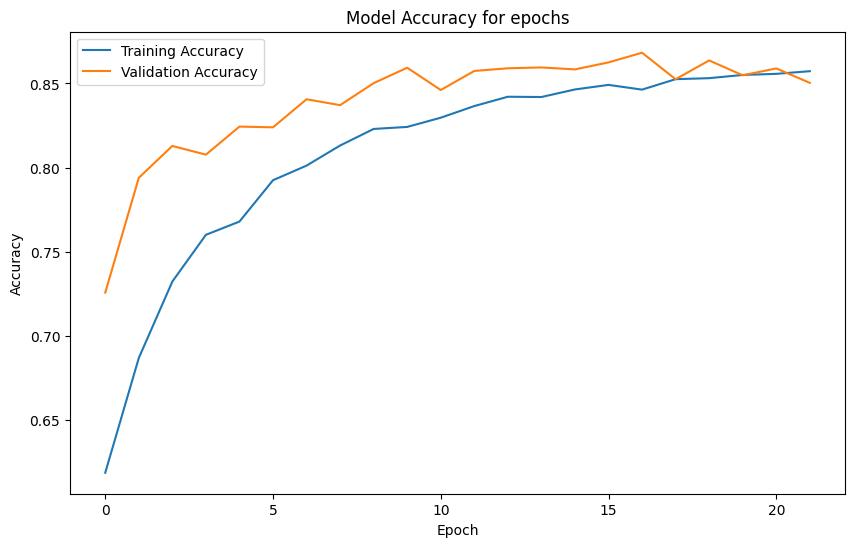

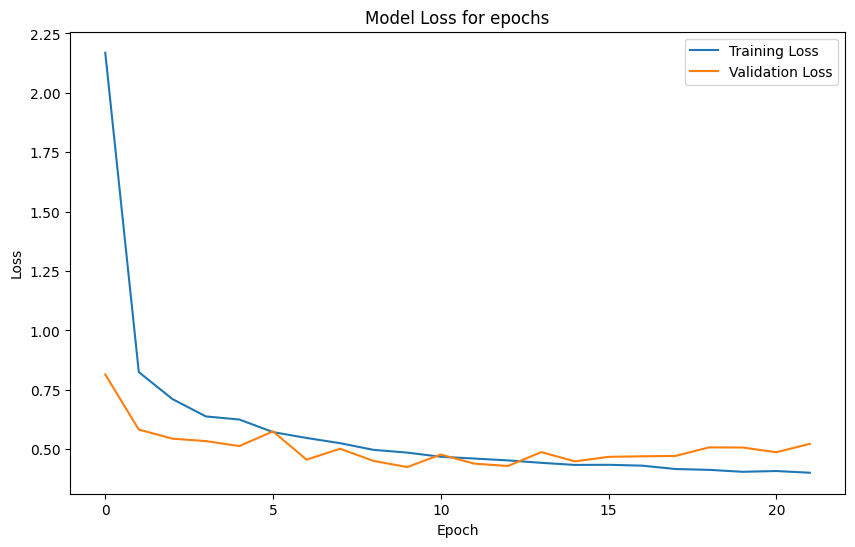

In [19]:
#Comparation training and validation accuracy
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy for epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#Comparation training and validation loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss for epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
